In [1]:
import globals as gl
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.cm as cm  

plt.style.use('default')

Base directory found: /Volumes/diedrichsen_data$/data/Chord_exp/ExtFlexChord
Atlas directory found: /Volumes/diedrichsen_data$/data/Atlas_templates/fs_LR_32


Text(0, 0.5, '% success')

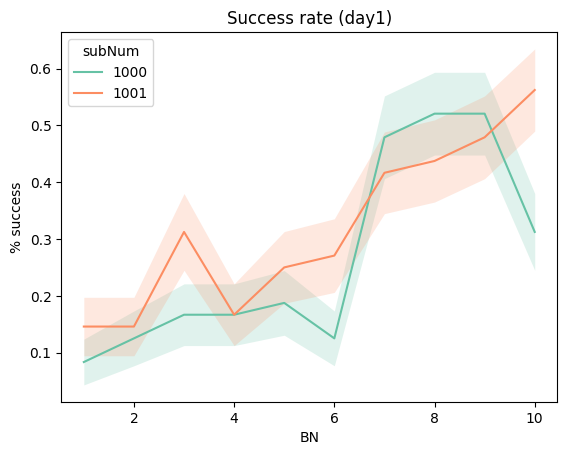

In [19]:
snS = [1000, 1001]
experiment = 'efc4'

day = 1

dat = pd.DataFrame()
for sn in snS:
    dat_tmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'{experiment}_{sn}.dat'), sep='\t')
    dat = pd.concat([dat, dat_tmp])
    
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

sns.lineplot(data=dat, ax=axs, x='BN', hue='subNum', y='trialPoint', errorbar='se', err_kws={'linewidth': 0}, palette='Set2')

axs.set_title(f'Success rate (day{day})')
axs.set_ylabel('% success')


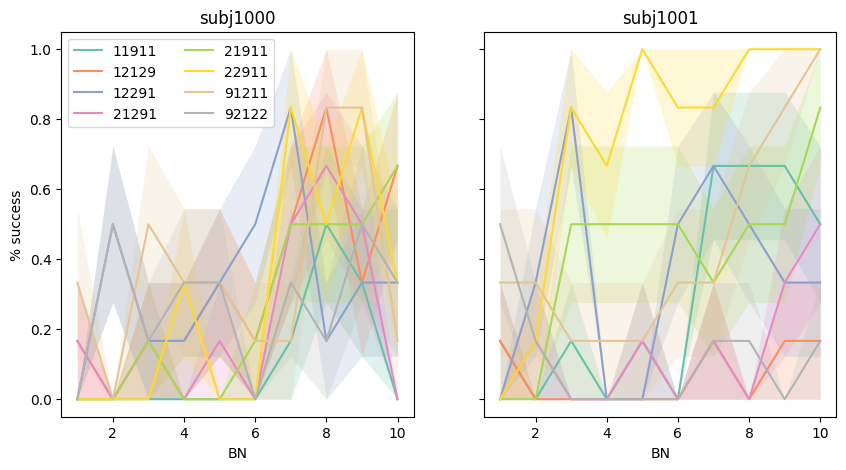

In [20]:
snS = [1000, 1001]
experiment = 'efc4'

day = 1

fig, axs = plt.subplots(nrows=1, ncols=len(snS), sharex=True, sharey=True, figsize=(10, 5))

for s, sn in enumerate(snS):
    dat = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}',f'subj{sn}', f'{experiment}_{sn}.dat'), sep='\t')
    
    if s == 0:
        sns.lineplot(data=dat, ax=axs[s], x='BN', hue='chordID', y='trialPoint', errorbar='se', err_kws={'linewidth': 0}, palette='Set2')
    else:
        sns.lineplot(data=dat, ax=axs[s], x='BN', hue='chordID', y='trialPoint', errorbar='se', err_kws={'linewidth': 0}, palette='Set2', legend=False)
    
    axs[s].set_title(f'subj{sn}')

axs[0].set_ylabel('% success')
axs[0].legend(loc='upper left', ncol=2)
# axs.set_title('Success rate')
# axs.set_ylabel('% success')

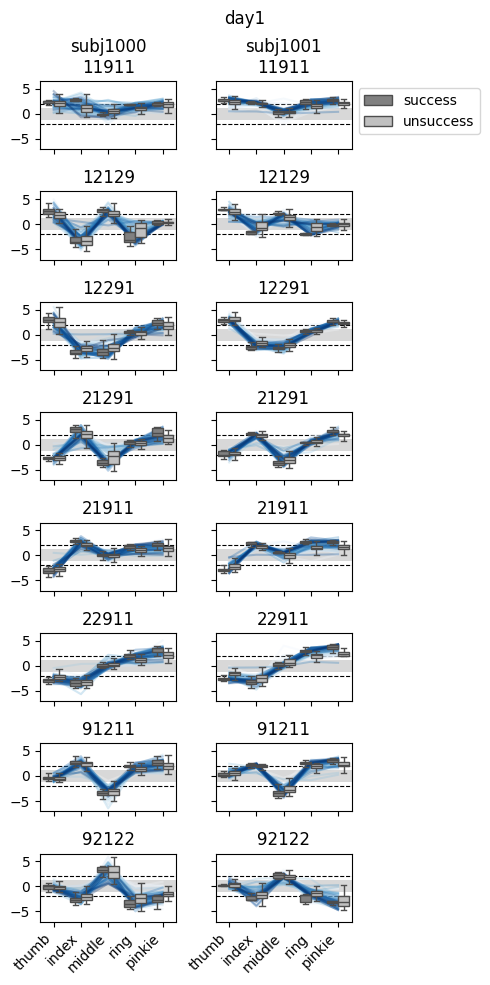

In [21]:
snS = [1000, 1001]
experiment = 'efc4'

day = 1

fig, axs = plt.subplots(nrows=8, ncols=len(snS), sharex=True, sharey=True, figsize=(5, 10))

for s, sn in enumerate(snS):

    data = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'single_trial.tsv'), sep='\t')
    
    data['trialPoint'] = data['trialPoint'].map(gl.trialPoint_mapping)

    for ch, chordID in enumerate(data.chordID.astype(int).sort_values().unique()):
        data_tmp = data[data['chordID'] == chordID]
        data_tmp_melt = data_tmp.melt(id_vars=['chordID', 'trialPoint'],value_vars=['thumb', 'index', 'middle', 'ring', 'pinkie'], var_name='finger', value_name='force')
        force = data_tmp[['thumb', 'index', 'middle', 'ring', 'pinkie']].to_numpy()
        
        colors = cm.Blues(np.linspace(0, 1, force.shape[0]))
        
        axs[ch, s].axhspan(-gl.fthresh, gl.fthresh, color='gray', alpha=0.3, lw=0)
        axs[ch, s].axhline(gl.ftarget, color='k', lw=.8, ls='--')
        axs[ch, s].axhline(-gl.ftarget, color='k', lw=.8, ls='--')
        
        for f, c in zip(force, colors):     
            axs[ch, s].plot(f, color=c, alpha=.3)
        
        if ch == 0:
            axs[ch, s].set_title(f'subj{sn}\n{chordID}')
            if s == 1:
                sns.boxplot(data=data_tmp_melt, ax=axs[ch, s], x='finger', hue='trialPoint', y='force', showfliers=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])
            else:
                sns.boxplot(data=data_tmp_melt, ax=axs[ch, s], x='finger', hue='trialPoint', y='force', showfliers=False, legend=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])
        else:
            axs[ch, s].set_title(f'{chordID}')
            sns.boxplot(data=data_tmp_melt, ax=axs[ch, s], x='finger', hue='trialPoint', y='force', showfliers=False, legend=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])
            
        axs[ch, s].set_ylabel('')

axs[0, 1].legend(bbox_to_anchor=(1, 1))
axs[-1, 0].set_xlabel('')
axs[-1, -1].set_xlabel('')
axs[-1, 0].set_xticks(axs[-1, 0].get_xticks(), rotation=45, labels=axs[-1, 0].get_xticklabels(), ha='right')
axs[-1, -1].set_xticks(axs[-1, -1].get_xticks(), rotation=45, labels=axs[-1, 0].get_xticklabels(), ha='right')

fig.suptitle(f'day{day}')
fig.tight_layout()